# What is a database?

A database is an organized collection of data. Database designers typically organize the data to model aspects of reality in a way that supports processes requiring information, such as (for example) modelling the availability of rooms in hotels in a way that supports finding a hotel with vacancies.



# Why use databases?

Databases support querying of subsets of information directly in a way that files and simple tabular data do not via *indexing*.  They also scale to larger collections of data than are practical direct access to a single file.

A data-science view of databases is that they give you what dataframes give you but on a scale **much** larger than what a typical in-memory dataframe provides.

# Some Guarantees for Databases

In addition to scaling and access, databases also tend to provide guarantees.  These are particularly critical for transaction processing systems where database updates may relate to financial transactions.

Next we'll talk about some of these guarantees:

* ACID
* The CAP Theorem

# ACID

In computer science, ACID (Atomicity, Consistency, Isolation, Durability) of database transactions intended to guarantee *validity* even in the event of errors, power failures, etc. 

* **Atomicity** requires that each transaction be "all or nothing": if one part of the transaction fails, then the entire transaction fails, and the database state is left unchanged.
* The **consistency** property ensures that any transaction will bring the database from one valid state to another. Any data written to the database must be valid according to all defined rules, including constraints, cascades, triggers, and any combination thereof. 
* The **isolation** property ensures that the concurrent execution of transactions results in a system state that would be obtained if transactions were executed sequentially, i.e., one after the other.
* The **durability** property ensures that once a transaction has been committed, it will remain so, even in the event of power loss, crashes, or errors. 

# The CAP Theorem

Eric Brewer is credited with formulating the theorem that a *distributed* data store cannot provide more than two out of the following three guarantees:

* **Consistency**:  Every read receives the most recent write or an error	
* **Availability**:  Every request receives a (non-error) response – without guarantee that it contains the most recent write	
* **Partition tolerance**:  The system continues to operate despite an arbitrary number of messages being dropped (or delayed) by the network between nodes

Phrased another way "the CAP theorem states that in the presence of a network partition, one has to choose between consistency and availability."

ref:  https://en.m.wikipedia.org/wiki/CAP_theorem

# Kinds of databases

In wide use today, we see databases broken broadly into **relational** and **NoSQL** databses.  The latter are *not* based on the relational model that underpins relational databases.

See also dozens of entries on https://en.m.wikipedia.org/wiki/Category:Types_of_databases

# Relational

This model organizes data into one or more tables (or "relations") of columns and rows, with a unique key identifying each row. Rows are also called records or tuples. Columns are also called attributes. Generally, each table/relation represents one "entity type" (such as customer or product). The rows represent instances of that type of entity (such as "Lee" or "chair") and the columns representing values attributed to that instance (such as address or price).  A relational database is a digital database based on this relational model of data, as proposed by E. F. Codd in 1970.

Rows in a table can be linked to rows in other tables by adding a column for the unique key of the linked row (such columns are known as foreign keys). Codd showed that data relationships of arbitrary complexity can be represented by a simple set of concepts.

from https://en.m.wikipedia.org/wiki/Relational_database

##  Example of a database schema

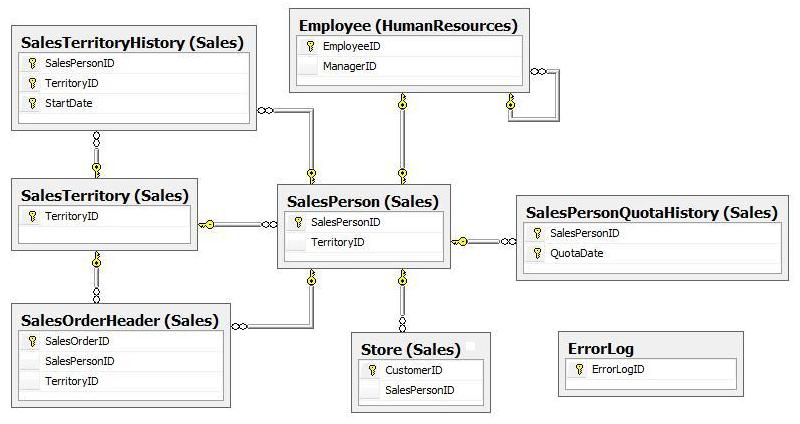


## Examples of Relational Databases

* Oracle
* DB2
* MySQL
* PostgreSQL
* sqlite
* ... dozens of others

## SQL

Relational databases in the modern era almost universally support SQL, the Structured [English] Query Language (formerly SEQL).  SQL provides both a **Data Definition Language** (controlling the *structure* of the database) and a **Data Manipulation Language** (controlling the data themselves).

An introduction to SQL and the SQLite database (a simple, all-in-one-file relational database) is available here:  http://www.sqlitetutorial.net/.

# NoSQL

A NoSQL (originally referring to "non SQL" or "non relational") database provides a mechanism for storage and retrieval of data that is modeled in means other than the tabular relations used in relational databases. 

Such databases have existed since the late 1960s, but did not obtain the "NoSQL" moniker until a surge of popularity in the early twenty-first century, triggered by the needs of Web 2.0 companies such as Facebook, Google, and Amazon.com.

Motivations for this approach include: **simplicity of design, simpler "horizontal" scaling to clusters of machines (which is a problem for relational databases), and finer control over availability. **

The data structures used by NoSQL databases (e.g. key-value, wide column, graph, or document) are different from those used by default in relational databases, making some operations faster in NoSQL. 

The particular suitability of a given NoSQL database depends on the problem it must solve. Sometimes the data structures used by NoSQL databases are also viewed as "more flexible" than relational database tables.

from https://en.m.wikipedia.org/wiki/NoSQL

## Examples of NoSQL Databases

* Column stores:  Accumulo, Cassandra, HBase
* Document stores:  CouchDB, MongoDB
* Key-value stores:  Redis, Riak, MemcacheDB, FoundationDB
* Graph stores:  AllegroGraph, Neo4J, Apache Giraph


In [11]:
import sqlite3
conn = sqlite3.connect("./chinook.db")
c = conn.cursor()

#  Notice that any user-defined bits of the query that we might prompt for are 
#  substituted into the query string using '?'.  This is called a *bind parameter*
#  and is substituted inside of the DB-API library
results = c.execute('''
select 
   artists.name, albums.title 
from 
   artists, albums 
where 
   artists.artistid = albums.artistid and 
   artists.name like ?
''', ['%glass%'])

In [12]:
#  We can then iterate over the rows to get our results.
for row in results:
    print(row)

('Philip Glass Ensemble', 'Koyaanisqatsi (Soundtrack from the Motion Picture)')


Additional examples are available here:  http://sebastianraschka.com/Articles/2014_sqlite_in_python_tutorial.html

Note however that places where users manually insert data into query strings are considered a common, **serious** 
security vulnerability (Google "SQL Injection" for more info) and should not be used if the input parameter 
values do not come from trusted sources (ProTip:  They seldom do).

See also https://xkcd.com/327/ about little Bobby Tables.